# Cosmochemistry example
*December 22, 2020*

This notebook shows some examples on how `iniabu` could be used in a cosmo- or geochemistry context. As before, we first load the package. The first two lines here adds the package to your python path in case you have not installed it and just cloned the repository with this notebook in it. Otherwise, feel free to comment them out.

In [1]:
import sys
sys.path.insert(0, '../../')  # add iniabu to python path from this repo

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from iniabu import ini  # load iniabu into ini

## Measurements
If we have a cosmochemistry example we often want to calculate $\delta$-values or internally normalized $\epsilon$-values from a set of measurements. Let us assumed we have measured the iron isotopic composition of 20 samples. These samples scatter randomly by 1% around their natural abundandance. In addition, they are mass-dependently fractionated and slightly enriched in <sup>57</sup>Fe.

In [2]:
# number of samples
num_samples = 20

# create variable for all iron isotopes
fe_isos = ini.iso["Fe"]

# create a list with all "signals", our measurements. T
measurements = []
for abu in fe_isos.abu_solar:
    measurements.append(abu + np.random.randn(num_samples) * abu / 100.)
    
# now linearly fractionate the mneasurements mass dependently by 1% per amu
for it, msr in enumerate(measurements):
    measurements[it] = (1 + (fe_isos.mass[it] - fe_isos.mass[0]) * 0.01) * msr

# enhance Fe-57 by another 0.5%
measurements[2] = 1.05 * measurements[2]

## $\delta$-values
Often we want to take our measurements and show them as delta values. For this, let us use the solar system values as loaded by `iniabu` for normalization and then have a look at various isotope ratios. We'll use <sup>56</sup>Fe as our main normalization isotope.

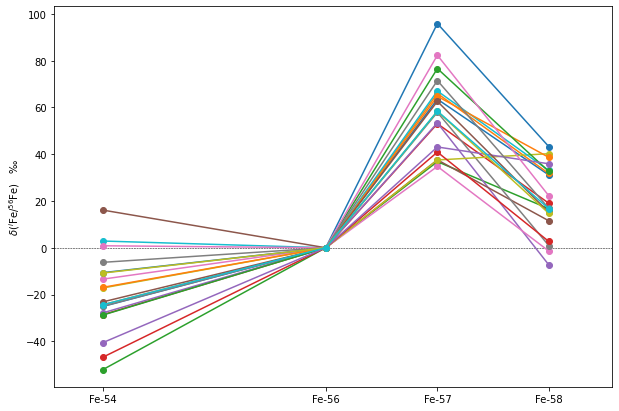

In [3]:
# calculate all delta-values
deltas = []
for it, msr in enumerate(measurements):
    deltas.append(ini.iso_delta(fe_isos.name[it], "Fe", msr / measurements[1]))

# create a figure for isotope patterns
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

xdata = fe_isos.mass
for it in range(num_samples):
    ydata = [delta[it] for delta in deltas]
    ax.plot(xdata, ydata, '-o')

# make the plot a bit nicer
xlim = (53.5, 58.5)
plt.hlines(0, xlim[0], xlim[1], color='k', linewidth=0.5, linestyle='dashed')
ax.set_xlim(53.5, 58.5)
ax.set_xticks(fe_isos.mass)
ax.set_xticklabels(fe_isos.name)

ax.set_ylabel("$\delta(^{i}\mathrm{Fe}/^{56}\mathrm{Fe})$   ‰")

plt.show()

## Internal normalization

In the above plot we get a hint at the excess in <sup>57</sup>Fe, but there is also mass-dependent fractionation. 

To remove the mass-dependent fractionation, we can normalize the dataset internally. Since we know we have applied a linear mass-dependent fractionation, we will use a linear law to correct for it.

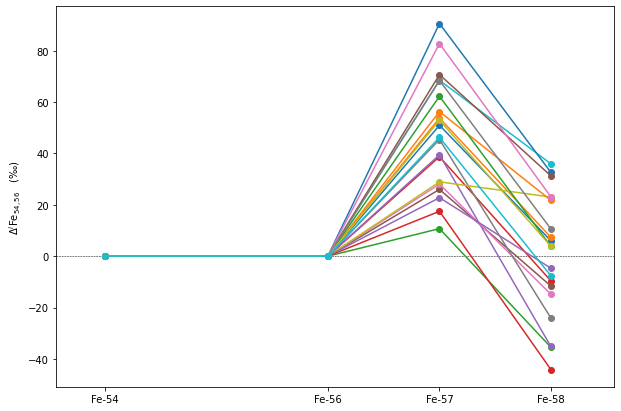

In [4]:
# Internally normalize, expressing results in parts per 1000 (see delta factor)
Deltas_int = []
for it, msr in enumerate(measurements):
    Deltas_int.append(
        ini.iso_int_norm(
        fe_isos.name[it], ("Fe-56", "Fe-54"), msr, (measurements[1], measurements[0]),
        delta_factor=1000, law="lin"
    )
    )


# Plot the results again
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

xdata = fe_isos.mass
for it in range(num_samples):
    ydata = [Delta[it] for Delta in Deltas_int]
    ax.plot(xdata, ydata, '-o')

# make the plot a bit nicer
xlim = (53.5, 58.5)
plt.hlines(0, xlim[0], xlim[1], color='k', linewidth=0.5, linestyle='dashed')
ax.set_xlim(53.5, 58.5)
ax.set_xticks(fe_isos.mass)
ax.set_xticklabels(fe_isos.name)

ax.set_ylabel("$\Delta^{i}\mathrm{Fe}_{54,56}$   (‰)")

plt.show()

Here we can now clearly see that <sup>58</sup>Fe scatters around zero while <sup>57</sup>Fe is positive in every case. Guessing the average, it is about 50‰, which is of course what we enriched it with from the beginning.

## Summary

The `iniabu` python package allows you to directly calculate $\delta$- and $\Delta$-values for your measurements and ratio them to the solar ratios. Of course you can also do the same thing for models, etc.

More usage cases are discussed in with jupyter notebook examples. In addition you can have a look at the package documentation [here](https://iniabu.readthedocs.io) or by looking at the docstring of any function.

If you encounter issues, please post them to the [`iniabu` GitHub page](https://github.com/galactic-forensics/iniabu). There you can also find a discussion forum.